In [1]:
from ipynb.fs.defs.covfit import *

In [2]:
# 2D confidence contours
#%matplotlib widget
interactive = False
from matplotlib import pyplot as plt
from scipy.stats import chi2, multivariate_normal

x = np.linspace(-4.0, 4.0, 500)
y = np.linspace(-4.0, 4.0, 500)
xx, yy = np.meshgrid(x, y)
data = np.concatenate((xx[...,np.newaxis], yy[...,np.newaxis]), axis=-1)

CL = [.30, .68, .95, .997]
l2 = chi2.ppf(CL, df=2)
l1 = chi2.ppf(CL, df=1)

plt.ioff()
fig, ax = plt.subplots(figsize=(4,4))
plt.ion()
fig.tight_layout()
ax.set_aspect("equal")
cmap = "winter"
cont = {}
zz = naive(data)
cont["naive"] = ax.contour(xx, yy, zz, levels=l2, cmap=cmap, linestyles="solid")

zz = scaled(data, 2)
cont["fitted"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles="dashdot")

zz = invariant1(data)
cont["invariant 1"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles="dashed")

zz = invariant2(data)
cont["invariant 2"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles="dotted")

zz = invariant3(data, alpha=0.7)
cont["invariant 3"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles=[(0,(3,1,1,1,1,1))])

# Add some "data"
cmap = "YlOrRd"
dat = {}
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
zz = dist.pdf(data)
dat["0% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

dist = multivariate_normal(mean=[0,0], cov=[[1,.5],[.5,1]])
zz = dist.pdf(data)
dat["50% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

dist = multivariate_normal(mean=[0,0], cov=[[1,.9],[.9,1]])
zz = dist.pdf(data)
dat["90% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

dist = multivariate_normal(mean=[0,0], cov=[[1,.99],[.99,1]])
zz = dist.pdf(data)
dat["99% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

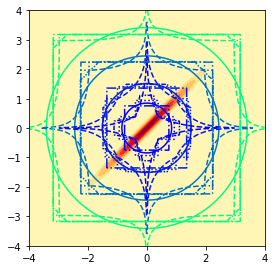

In [3]:
# (Interactive) plot
import ipywidgets as widgets

state = {}
for k in cont:
    state[k] = True
state["data"] = ["None"] + list(dat.keys())
    
def toggle_visibility(data="None", **kwargs):
    for k, v in kwargs.items():
        for a in cont[k].collections:
             a.set_visible(v)
    for k in dat:
        v = (k == data)
        for a in dat[k].collections:
            a.set_visible(v)
            
if interactive:
    w = widgets.interactive(toggle_visibility, **state)
    #fig.canvas.resizable=False
    fig.canvas.header_visible = False
    ui = widgets.AppLayout(left_sidebar=fig.canvas, right_sidebar=w)
    display(ui)
else:
    display(fig)